In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import csv
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
%matplotlib inline

In [5]:
df=pd.read_csv('total-cases-covid-19.csv')

In [6]:
l1=list(set(df.Entity))
d1={}
for i in range(len(l1)):
    d1[i]=l1[i]
d1
    
    


{0: 'Dominican Republic',
 1: 'Liechtenstein',
 2: 'Pakistan',
 3: 'Belarus',
 4: 'Netherlands',
 5: 'Algeria',
 6: 'India',
 7: 'Iraq',
 8: 'Lebanon',
 9: 'South Africa',
 10: 'Syria',
 11: 'Uganda',
 12: 'Bolivia',
 13: 'Liberia',
 14: 'Venezuela',
 15: 'Ethiopia',
 16: 'Nigeria',
 17: 'Latvia',
 18: 'Somalia',
 19: 'Congo',
 20: 'Egypt',
 21: 'Moldova',
 22: 'Austria',
 23: 'Canada',
 24: 'Cyprus',
 25: 'Eritrea',
 26: 'San Marino',
 27: 'Vietnam',
 28: 'Gabon',
 29: 'Georgia',
 30: 'Japan',
 31: 'Guyana',
 32: 'Jamaica',
 33: 'Kuwait',
 34: 'Tunisia',
 35: 'New Zealand',
 36: 'Hungary',
 37: 'Colombia',
 38: 'Kenya',
 39: 'France',
 40: 'Honduras',
 41: "Cote d'Ivoire",
 42: 'Cuba',
 43: 'Gambia',
 44: 'Sudan',
 45: 'Oman',
 46: 'Chile',
 47: 'Denmark',
 48: 'Paraguay',
 49: 'Ireland',
 50: 'Australia',
 51: 'Turkey',
 52: 'Trinidad and Tobago',
 53: 'Singapore',
 54: 'Togo',
 55: 'United Arab Emirates',
 56: 'Uzbekistan',
 57: 'Mauritania',
 58: 'Bhutan',
 59: 'Croatia',
 60: 'Bur

In [8]:
print("Enter the number assosciated with the country that you want to know.")
n=int(input())
y=df[df.Entity==d1[n]]
print("Currently covid cases in "+d1[n]+" is "+str(y.confirmedcases.iloc[-1]))
print("The current number of deaths is "+str(y.Death.iloc[-1]))
print("The death rate of the country is "+(y.Deathrate.iloc[-1]))
print("The recovered cases in "+d1[n]+" is "+str(y.recovered.iloc[-1]))
if(float(y.Deathrate.iloc[-1])>6):
    print("The country is not safe as the death rate is above 6% ")
else:
    print("The country is safe as the death rate is below 6%")



Enter the number assosciated with the country that you want to know.
2
Currently covid cases in Pakistan is 7025
The current number of deaths is 176.0
The death rate of the country is 2.505338078
The recovered cases in Pakistan is 1765.0
The country is safe as the death rate is below 6%


In [9]:
y

,Entity,Date,confirmedcases,Death,recovered,Deathrate,RecoveryRate
5905,Pakistan,22-Jan-20,0,0.0,0.0,#DIV/0!,#DIV/0!
5906,Pakistan,23-Jan-20,0,0.0,0.0,#DIV/0!,#DIV/0!
5907,Pakistan,24-Jan-20,0,0.0,0.0,#DIV/0!,#DIV/0!
5908,Pakistan,25-Jan-20,0,0.0,0.0,#DIV/0!,#DIV/0!
5909,Pakistan,26-Jan-20,0,0.0,0.0,#DIV/0!,#DIV/0!
...,...,...,...,...,...,...,...
5982,Pakistan,13-Apr-20,5374,128.0,1095.0,2.381838482,20.37588389
5983,Pakistan,14-Apr-20,5716,135.0,1378.0,2.361791463,24.10776767
5984,Pakistan,15-Apr-20,5988,143.0,1446.0,2.388109552,24.14829659
5985,Pakistan,16-Apr-20,6505,168.0,1645.0,2.582628747,25.28823982


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  if __name__ == '__main__':


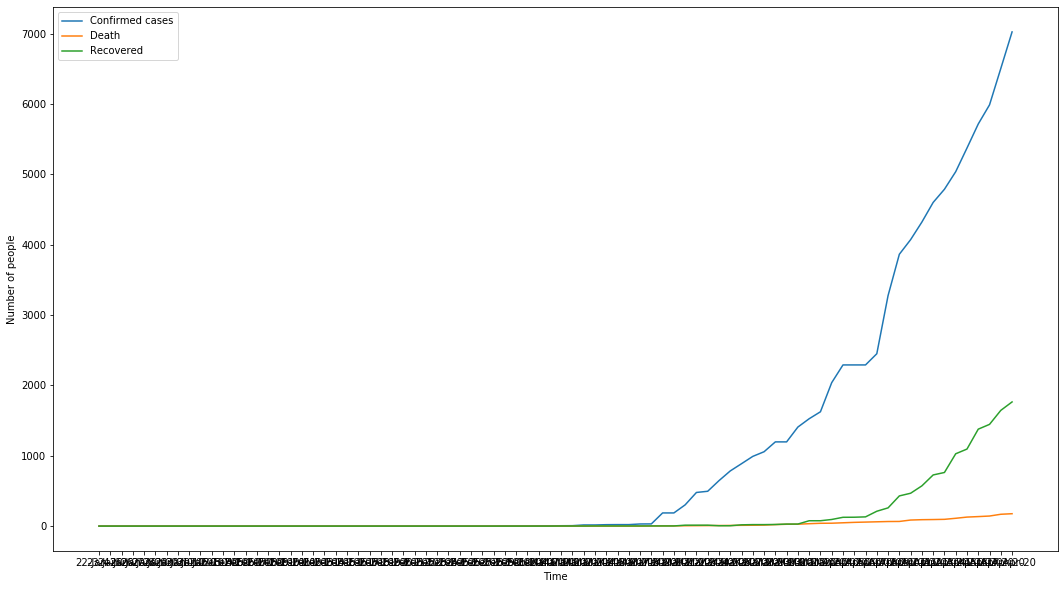

In [10]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)


plt.plot(y.Date, y.confirmedcases)
plt.plot(y.Date, y.Death)
plt.plot(y.Date, y.recovered)
ax0 = plt.gca()
ax0.locator_params(axis='x', nbins=10)
plt.legend(['Confirmed cases',"Death","Recovered"])
plt.xlabel('Time')
plt.ylabel("Number of people")


plt.show()


Text(0, 0.5, 'Number of recovered')

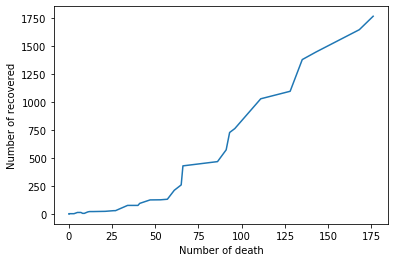

In [11]:
plt.plot(y.Death, y.recovered)
plt.xlabel('Number of death')
plt.ylabel("Number of recovered")



In [12]:
d2={}
for ele in d1.values():
    y=df[df.Entity==ele]
    
    k=y.confirmedcases.iloc[-1]
    d2[ele]=k
d3={}
for ele in d1.values():
    y=df[df.Entity==ele]
   
    k=y.Death.iloc[-1]
    d3[ele]=k
d4={}
for ele in d1.values():
    y=df[df.Entity==ele]
    k=y.Deathrate.iloc[-1]
    d4[ele]=k
d4={k: v for k, v in sorted(d4.items(), key=lambda item: item[1], reverse=True)}
print("The top countries that are not suggested for students for their internship and placement are:")    
d2={k: v for k, v in sorted(d2.items(), key=lambda item: item[1], reverse=True)}
i=0
d5={}
for o in d2:
    if(i<20):
        i=i+1
        if(i==1):
            continue
        else:
            print(o, d2[o])
            d5[o]=d2[o]
    else:
        break
print("The death rate of each countries is written to csv file topDeathRate.csv")
(pd.DataFrame(d4.items(),columns=['Country','Deathrate'])).to_csv('topDeathRate.csv')
topcountries=pd.DataFrame(d2.items(), columns=['Country', 'Cases'])
topcountries.to_csv('out.csv')



The top countries that are not suggested for students for their internship and placement are:
United States 671331
Spain 182816
Italy 168941
Germany 133830
France 108847
United Kingdom 103093
China 83754
Iran 77995
Turkey 74193
Belgium 34809
Brazil 30425
Canada 30081
Netherlands 29214
Russia 27938
Switzerland 26651
Portugal 18841
Austria 14448
India 13387
Ireland 13271
The death rate of each countries is written to csv file topDeathRate.csv


In [14]:
d6={}
for r in range(len(l1)):
    y=df[df.Entity==l1[r]]
    l2=y.Death
    l3=y.recovered
    l4=y.confirmedcases
    l2=list(l2)
    l3=list(l3)
    l4=list(l4)
    count=0
    recovered=0
    for i in range(len(l2)):
        if(l2[i]>0):
            firstdeath=i
            count=1
            break

    for i in range(len(l4)):
        if(l4[i]>0):
            firstconfirmedcase=i
            break
    for i in range(len(l3)):
        if(l3[i]>0):
            firstrecovered=i
            recovered=1
            break
    if(count==1):
        avdeath=firstdeath-firstconfirmedcase
    else:
        avdeath=None
    if(recovered==1):
        avrecover=firstrecovered-firstconfirmedcase
    else:
        avrecover=None
        
    d6[l1[r]]=[avdeath,avrecover]
    

    

        


In [19]:
d7={}
for ele in d1.values():
    y=df[df.Entity==ele]
    k=float(y.RecoveryRate.iloc[-1])
    d7[ele]=k
d7={k: v for k, v in sorted(d7.items(), key=lambda item: item[1], reverse=True)}    
RecoveryRate=pd.DataFrame(d7.items(), columns=['Country', 'Recovery Rate'])
RecoveryRate.to_csv('RecRate.csv')
print("The countries which are ahead in recovering this disease are written otput to file RecRate.csv")

The countries which are ahead in recovering this disease are written otput to file RecRate.csv


In [16]:
for i in range(len(l1)):
    print(i,l1[i]) 
u=int(input("Enter the number assosciated with the country you want to know")) 
print("The average death time in days is ") 
print(d6[l1[u]][0])
if(d6[l1[u]][0]==None):
    print("None as there is no deaths in the country")
print("The average recovery time in days is ")
print(d6[l1[u]][1])

0 Dominican Republic
1 Liechtenstein
2 Pakistan
3 Belarus
4 Netherlands
5 Algeria
6 India
7 Iraq
8 Lebanon
9 South Africa
10 Syria
11 Uganda
12 Bolivia
13 Liberia
14 Venezuela
15 Ethiopia
16 Nigeria
17 Latvia
18 Somalia
19 Congo
20 Egypt
21 Moldova
22 Austria
23 Canada
24 Cyprus
25 Eritrea
26 San Marino
27 Vietnam
28 Gabon
29 Georgia
30 Japan
31 Guyana
32 Jamaica
33 Kuwait
34 Tunisia
35 New Zealand
36 Hungary
37 Colombia
38 Kenya
39 France
40 Honduras
41 Cote d'Ivoire
42 Cuba
43 Gambia
44 Sudan
45 Oman
46 Chile
47 Denmark
48 Paraguay
49 Ireland
50 Australia
51 Turkey
52 Trinidad and Tobago
53 Singapore
54 Togo
55 United Arab Emirates
56 Uzbekistan
57 Mauritania
58 Bhutan
59 Croatia
60 Burkina Faso
61 Ecuador
62 Madagascar
63 Uruguay
64 Brazil
65 Chad
66 Bosnia and Herzegovina
67 Argentina
68 Norway
69 Kazakhstan
70 Papua New Guinea
71 Guinea
72 Haiti
73 Luxembourg
74 Slovenia
75 Iceland
76 Iran
77 Rwanda
78 El Salvador
79 China
80 Suriname
81 Sri Lanka
82 Senegal
83 Bahamas
84 Serbia
8

In [3]:
re=pd.read_csv('AgeGroupDetails.csv')
re

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [5]:
d10={}
for i in range(len(re.Sno)):
    d10[re.AgeGroup.iloc[i]]=re.Percentage.iloc[i]
d10

{'0-9': '3.18%',
 '10-19': '3.90%',
 '20-29': '24.86%',
 '30-39': '21.10%',
 '40-49': '16.18%',
 '50-59': '11.13%',
 '60-69': '12.86%',
 '70-79': '4.05%',
 '>=80': '1.45%',
 'Missing': '1.30%'}

In [16]:
d9={}
for i in range(len(re.Sno)):
    d9[i]=re.AgeGroup.iloc[i]
n=int(input("Enter the key assosciated with the age you want to know"))
d9

Enter the key assosciated with the age you want to know3


{0: '0-9',
 1: '10-19',
 2: '20-29',
 3: '30-39',
 4: '40-49',
 5: '50-59',
 6: '60-69',
 7: '70-79',
 8: '>=80',
 9: 'Missing'}

In [17]:
print(d10[d9[n]])

21.10%


In [21]:
print("The percentage of corona for students age group is")
print(float(d10[d9[1]].rstrip('%'))+float(d10[d9[2]].rstrip('%')))

The percentage of corona for students age group is
28.759999999999998


In [ ]:
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [ ]:
init_notebook_mode(connected=True)

In [ ]:
df=pd.read_excel('coronadata.xlsx')

In [ ]:
df.head()

In [ ]:
data=dict(type='choropleth',locations=df['Countries'],locationmode='country names',text=df['Countries'],z=df['Confirmed'],colorbar={'title':'in millions'},colorscale='ice')
layout=dict(title='COVID-19 Cases',geo=dict(showframe=False,projection={'type':'orthographic'},showlakes=True,lakecolor='#9cd3db'))

In [ ]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)